# Spectral Analysis of Hydrogen and Deuterium

## Import Functions

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import lfilter


def get_max(v):
    max = v[0]
    index = 0
    for i in range(1,len(v)):
        if v[i] > max:
            max = v[i]
            index = i
    return max, index


def change_scale(time):
    t_scale = get_max(time)[0] / len(time)
    return t_scale


def get_time(voltage, time, t_start, t_break):
    start = int(t_start / change_scale(time))
    end = int(t_break / change_scale(time))
    v = voltage[start:end]
    t = time[start:end]
    val, indic = get_max(v)
    return t[indic]



## Data Processing and Measurement

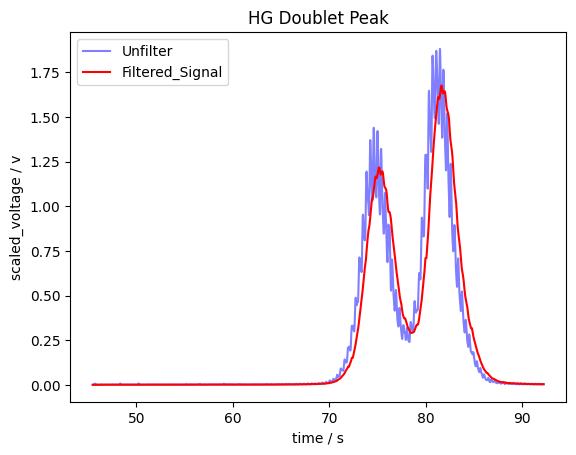

In [15]:
time = []
voltage = []
file_name = "doublet"

with open(f"{file_name}/{file_name}_1.csv") as csvfile:
    read_data = csv.reader(csvfile, delimiter=',')
    for row in read_data:
        time.append(float(row[0]))
        voltage.append(float(row[1]))
start_len = int(len(time)/2)
time = time[start_len:]
voltage = voltage[start_len:]

n = 10000
b = [1.0 / n] * n
a = 1
v_filter = lfilter(b, a, voltage)

fig, ax = plt.subplots()
ax.plot(time, voltage, 'b', label="Unfilter", alpha=0.5)
ax.plot(time, v_filter, 'r', label="Filtered_Signal")
ax.set_xlabel("time / s")
ax.set_ylabel("scaled_voltage / v")
ax.set_title(f"HG Doublet Peak")
ax.legend()
plt.savefig(f"{file_name}")

In [41]:
t1 = get_time(v_filter, time, 5, 15)
t2 = get_time(v_filter, time, 20, 30)
t_diff = t2 - t1
w_diff = t_diff * 0.08740
print(f"t1 = {t1}, t2 = {t2} \nThe diff in time is {t_diff} \nThe different in wavelength = {w_diff} A")

t1 = 11.654252, t2 = 25.030044 
The diff in time is 13.375792 
The different in wavelength = 1.1690442208 A


## Statistical Data

#### Doublet

In [56]:
T_diff = [6.8635, 6.8632, 6.8753, 6.8617, 6.8660]
W_diff = [0, 0, 0, 0, 0]
df1 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print(df1)
df1.describe().loc[["count", "mean", "std", "min", "max"]]

   t_dff(s)  wavelength_diff(A)
0    6.8635                   0
1    6.8632                   0
2    6.8753                   0
3    6.8617                   0
4    6.8660                   0


,t_dff(s),wavelength_diff(A)
count,5.000000,5.0
mean,6.865940,0.0
std,0.005456,0.0
min,6.861700,0.0
max,6.875300,0.0


#### n_i = 3

In [68]:
T_diff = [20.076, 20.425, 21.095, 20.272, 20.669]
W_diff = [1.8420, 1.7851, 1.8437, 1.7718, 1.8064]
df2 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 3")
print(df2)
df2.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 3
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,20.507400,1.809800
std,0.393604,0.032603
min,20.076000,1.771800
max,21.095000,1.843700


#### n_i = 4

In [69]:
T_diff = [14.924, 15.001, 14.908, 13.733, 13.906]
W_diff = [1.3043, 1.3119, 1.3029, 1.2003, 1.2154]
df3 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 4")
print(df2)
df3.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 4
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,14.494400,1.266960
std,0.620123,0.054331
min,13.733000,1.200300
max,15.001000,1.311900


#### n_i = 5

In [70]:
T_diff = [12.816, 13.507, 12.536, 12.432, 13.456]
W_diff = [1.1201, 1.1805, 1.0956, 1.0866, 1.1760]
df4 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 5")
print(df2)
df4.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 5
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,12.949400,1.131760
std,0.505954,0.044203
min,12.432000,1.086600
max,13.507000,1.180500


#### n_i = 6

In [71]:
T_diff = [12.430, 13.982, 13.476, 12.768, 11.809]
W_diff = [1.0864, 1.2220, 1.1778, 1.1159, 1.0321]
df5 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 6")
print(df2)
df5.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 6
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,12.893000,1.126840
std,0.855988,0.074805
min,11.809000,1.032100
max,13.982000,1.222000


### n_i = 6 : new data

In [72]:
T_diff = [12.730, 13.046, 12.688, 13.438, 13.100]
W_diff = [1.1126, 1.1402, 1.1089, 1.1744, 1.1450]
df5 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 6")
print(df2)
df5.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 6
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,13.000400,1.136220
std,0.305861,0.026716
min,12.688000,1.108900
max,13.438000,1.174400


### n_i = 7

In [73]:
T_diff = [12.651, 12.657, 12.643, 13.122, 12.471]
W_diff = [1.1057, 1.1062, 1.1050, 1.1468, 1.0900]
df6 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 7")
print(df2)
df6.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 7
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.00000,5.000000
mean,12.70880,1.110740
std,0.24374,0.021269
min,12.47100,1.090000
max,13.12200,1.146800


### n_i = 8

In [74]:
T_diff = [12.366, 12.307, 12.957, 12.299, 13.376]
W_diff = [1.0808, 1.0756, 1.1320, 1.0749, 1.1690]
df7 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 8")
print(df2)
df7.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 8
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,12.661000,1.106460
std,0.485342,0.042339
min,12.299000,1.074900
max,13.376000,1.169000


## Produce Graphs in Batch

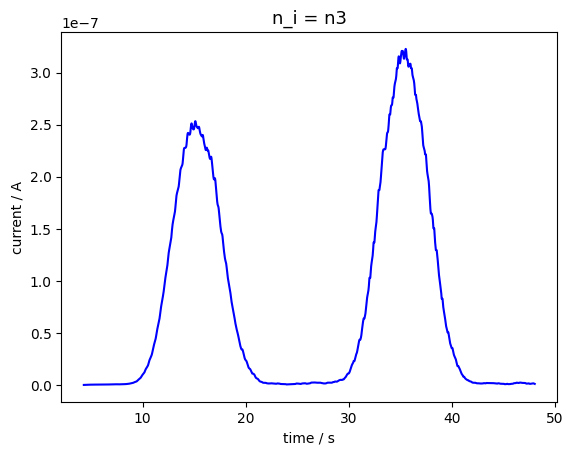

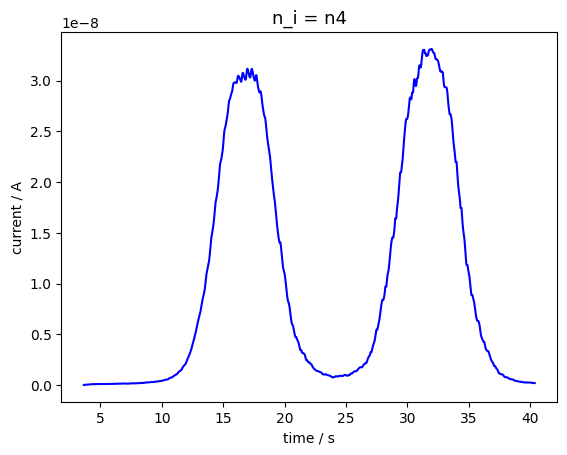

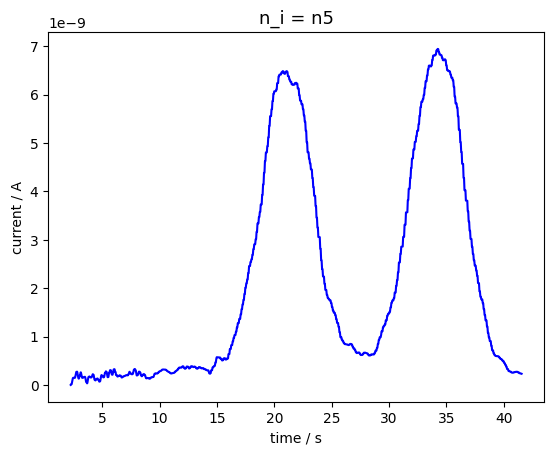

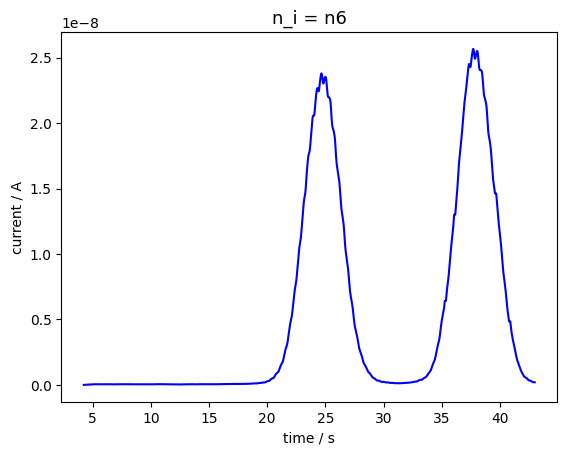

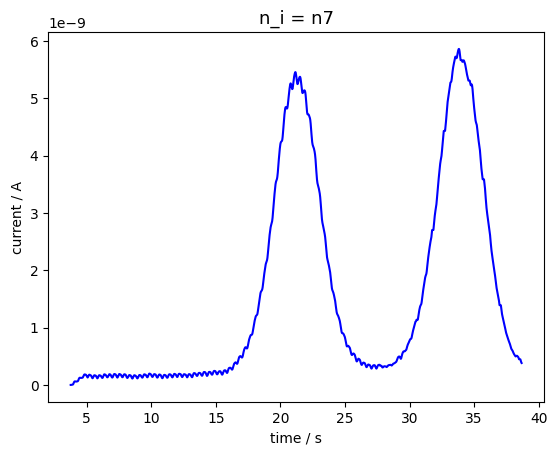

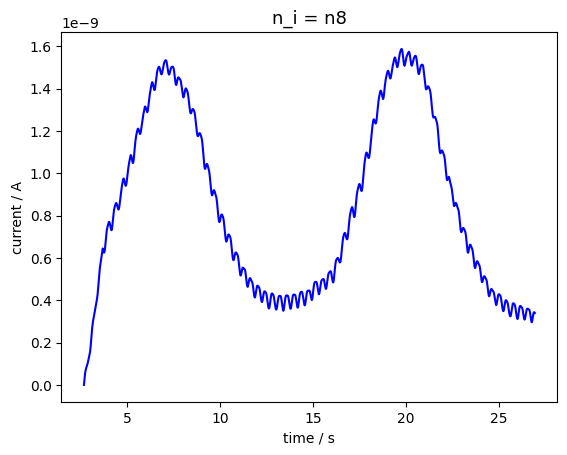

In [44]:
file_name = ["n3", "n4", "n5", "n6", "n7", "n8"]
current_range = np.array([10**(-6), 10**(-7), 10**(-8), 10**(-7), 10**(-8), 10**(-9)])
for i in range(len(file_name)):
    time = []
    voltage = []
    
    with open(f"{file_name[i]}/{file_name[i]}_2.csv") as csvfile:
        read_data = csv.reader(csvfile, delimiter=',')
        for row in read_data:
            time.append(float(row[0]))
            voltage.append(float(row[1]))
    start_len = int(len(time)/10)
    time = time[start_len:]
    voltage = current_range[i] * np.array(voltage[start_len:])
    

    n = 10000
    b = [1.0 / n] * n
    a = 1
    v_filter = lfilter(b, a, voltage)

    fig, ax = plt.subplots()
    # ax.plot(time, voltage, 'b', label="Unfilter")
    ax.plot(time, v_filter, "b", label=f"ni = {file_name[i]}")
    ax.set_xlabel("time / s")
    ax.set_ylabel(f"current / A")
    ax.set_title(f"n_i = {file_name[i]}", fontsize=13)
    plt.savefig(f"{file_name[i]}")

## Compare Results with Prediction

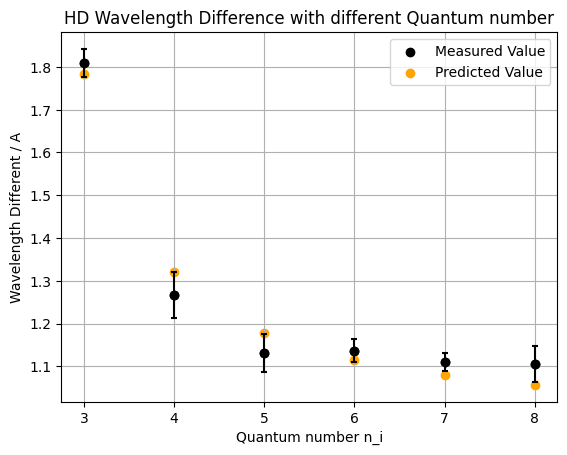

In [122]:
n_i = [3, 4, 5, 6, 7, 8]
pred = [1.783, 1.321, 1.179, 1.114, 1.079, 1.057]
dataframe = [df2, df3, df4, df5, df6, df7]
measured = []
uncertainty = []
for i in dataframe:
    measured.append(i.iloc[:, 1].mean())
    uncertainty.append(i.iloc[:, 1].std())


fig, ax = plt.subplots()

ax.errorbar(n_i, 
            measured, 
            yerr=uncertainty, 
            ecolor="k", 
            markerfacecolor="black", 
            markeredgecolor="black", 
            fmt="o", 
            capthick=1.5, 
            capsize=2)
ax.scatter(n_i, 
           measured, 
           color= "black", 
           label="Measured Value")
ax.scatter(n_i, 
           pred, 
           color="orange", 
           label="Predicted Value")

ax.set_title("HD Wavelength Difference with different Quantum number")
ax.set_xlabel("Quantum number n_i")
ax.set_ylabel("Wavelength Different / A")
ax.legend()
ax.grid()

plt.savefig("HD_diff")